In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f=open("C:/Users/xyr19/Desktop/python/WorldIndex.csv")
df = pd.read_csv(f)
df.columns = ["Country","Continent","Life_expectancy","GDP_per_capita","Population"]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
Country            177 non-null object
Continent          177 non-null object
Life_expectancy    169 non-null float64
GDP_per_capita     169 non-null float64
Population         176 non-null float64
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


In [17]:
print(df)

       Country      Continent  Life_expectancy  GDP_per_capita  Population
0      Algeria         Africa        75.042537     4132.760292  39871528.0
1       Angola         Africa        52.666098     3695.793748  27859305.0
2        Benin         Africa        59.720707      783.947091  10575952.0
3     Botswana         Africa        64.487415     6532.060501   2209197.0
4      Burundi         Africa        57.107049      303.681022  10199270.0
..         ...            ...              ...             ...         ...
172   Paraguay  South America        73.025634     4109.367724   6639119.0
173       Peru  South America        74.780732     6030.343259  31376671.0
174   Suriname  South America        71.294171     8818.982566    553208.0
175    Uruguay  South America        77.138220    15524.842470   3431552.0
176  Venezuela  South America        74.409610             NaN  31155134.0

[177 rows x 5 columns]


In [4]:
data = df.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 175
Data columns (total 5 columns):
Country            164 non-null object
Continent          164 non-null object
Life_expectancy    164 non-null float64
GDP_per_capita     164 non-null float64
Population         164 non-null float64
dtypes: float64(3), object(2)
memory usage: 7.7+ KB


In [13]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 直方图

<function matplotlib.pyplot.show(*args, **kw)>

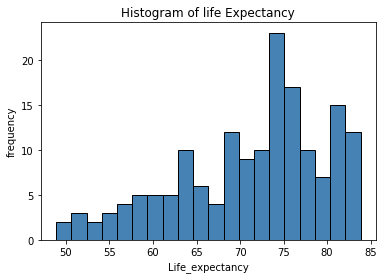

In [19]:
plt.hist(data.Life_expectancy,bins=20,color="steelblue",edgecolor="black")
plt.xlabel("Life_expectancy")
plt.ylabel("frequency")
plt.title("Histogram of life Expectancy")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

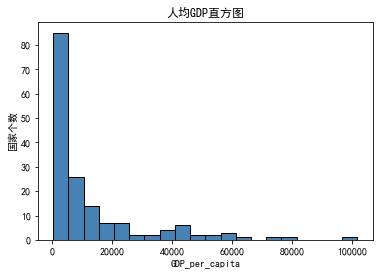

In [24]:
plt.hist(data.GDP_per_capita,bins=20,color="steelblue",edgecolor="black")
plt.xlabel("GDP_per_capita")
plt.ylabel("国家个数")
plt.title("人均GDP直方图")
plt.show

# 箱线图

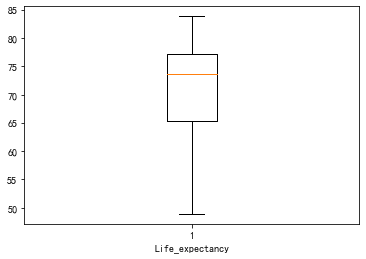

In [25]:
plt.boxplot(data.Life_expectancy,whis=1.5)
plt.xlabel("Life_expectancy")
plt.show()

# 条形图

In [5]:
#绘制每个大洲的国家个数条形图
conti_count = data.Continent.value_counts()
conti_count

Africa           48
Europe           41
Asia             36
North America    19
South America    11
Oceania           9
Name: Continent, dtype: int64

In [6]:
conti = list(conti_count.index)
conti

['Africa', 'Europe', 'Asia', 'North America', 'South America', 'Oceania']

In [7]:
x = np.arange(len(conti))
x

array([0, 1, 2, 3, 4, 5])

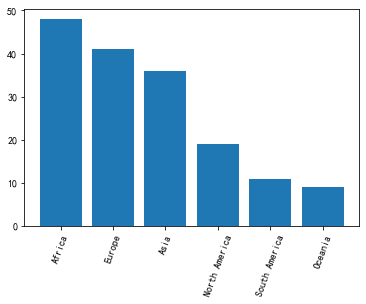

In [30]:
plt.bar(x, conti_count)
plt.xticks(x, conti, rotation=70)   # rotation 旋转横坐标标签
plt.show()

# 饼图

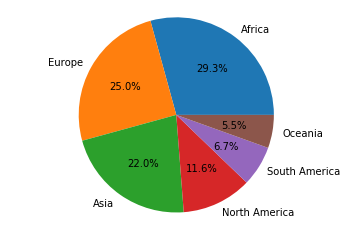

In [8]:
#绘制各大洲国家数量占比的饼图
plt.pie(conti_count, labels=conti, autopct='%1.1f%%')  # autopct 显示占比
plt.axis('equal')  # 调整坐标轴的比例
plt.show()

# 散点图

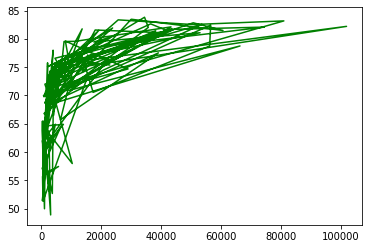

In [10]:
#绘制人均寿命和人均GDP的关系（散点）
plt.plot(data.GDP_per_capita, data.Life_expectancy,'g')
plt.show()

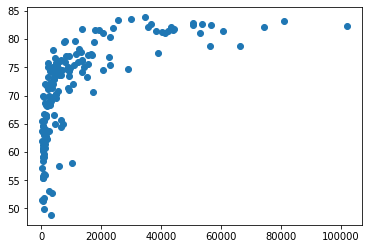

In [11]:
plt.scatter(data.GDP_per_capita, data.Life_expectancy)
plt.show()

# 气泡图

In [ ]:
#人均GDP与人均寿命的气泡图（数据点大小，正比于人口数） 

Text(0, 0.5, '人均寿命')

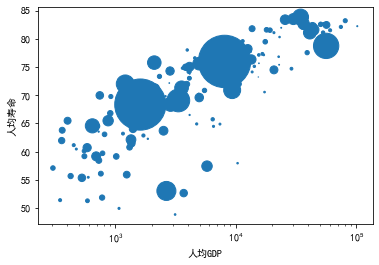

In [14]:
size = data.Population / 1e6 * 2  # 数据点大小，正比于人口数
plt.scatter(x=data.GDP_per_capita, y=data.Life_expectancy, s=size)  # 参数s设置点的大小
plt.xscale('log')

plt.xlabel('人均GDP')
plt.ylabel('人均寿命')

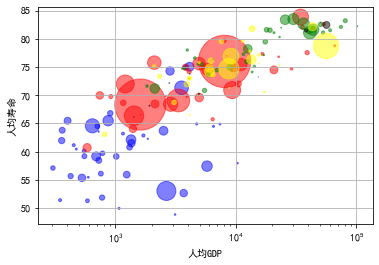

In [18]:
#给不同洲的国家设置不同的颜色
map_dict = { 'Asia':'red','Europe':'green','Africa':'blue','North America':'yellow','South America':'yellow','Oceania':'black'}
colors = data.Continent.map(map_dict)   # 将国家按所在州对于不同的颜色
size = data.Population / 1e6 * 2  # 数据点大小，正比于人口数
plt.scatter(x=data.GDP_per_capita, y=data.Life_expectancy, s=size, c=colors, alpha=0.5)  # 参数s设置点的大小
plt.xscale('log')

plt.xlabel('人均GDP')
plt.ylabel('人均寿命')
plt.grid(True) 
plt.show()

# Scipy求解方程

In [ ]:
#求解f(x)=2*sin(x)-x+1

In [21]:
from scipy.optimize import root,fsolve

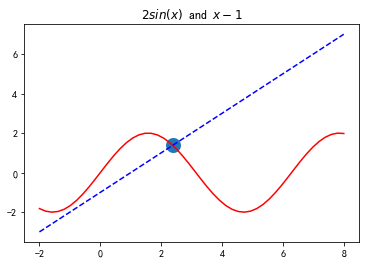

In [24]:
rangex1 = np.linspace(-2,8)
y1,y1_1 = 2*np.sin(rangex1),rangex1-1
plt.figure(1)
plt.plot(rangex1,y1,'r',rangex1,y1_1,'b--')
plt.title('$2sin(x)$ and $x-1$')

def f1(x):
    return np.sin(x)*2-x+1
 
sol1_root = root(f1,[2])
sol1_fsolve = fsolve(f1,[2])
plt.scatter(sol1_fsolve,2*np.sin(sol1_fsolve),linewidths=9)
plt.show()

In [ ]:
#求解线性方程组{3X1+2X2=3;X1-2X2=5}

In [25]:
def f2(x):
    return np.array([3*x[0]+2*x[1]-3,x[0]-2*x[1]-5])
 
sol2_root = root(f2,[0,0])
sol2_fsolve = fsolve(f2,[0,0])
print(sol2_fsolve)
 
a = np.array([[3,2],[1,-2]])
b = np.array([3,5])
x = np.linalg.solve(a,b)
print(x)

[ 2.  -1.5]
[ 2.  -1.5]
